In [216]:
import numpy as np # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import xgboost as xgb  # type: ignore


In [217]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [218]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [219]:
train_data.shape


(1460, 81)

In [220]:
test_data.shape

(1459, 80)

# hundling Missing Data

In [221]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [222]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

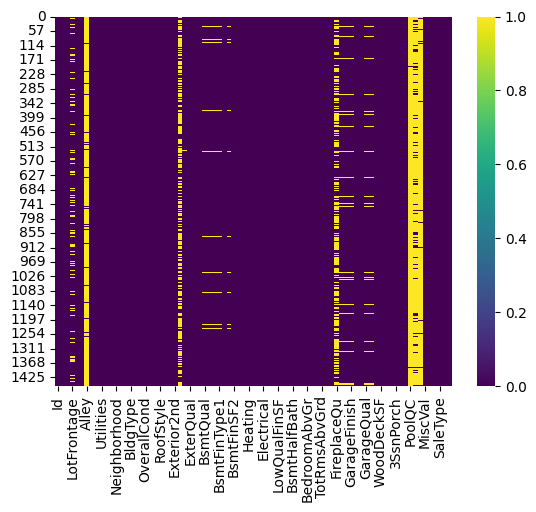

In [223]:
sns.heatmap(train_data.isnull(),cbar=True,cmap='viridis') 
# 1.0 for not null and 0.0 for null

<Axes: >

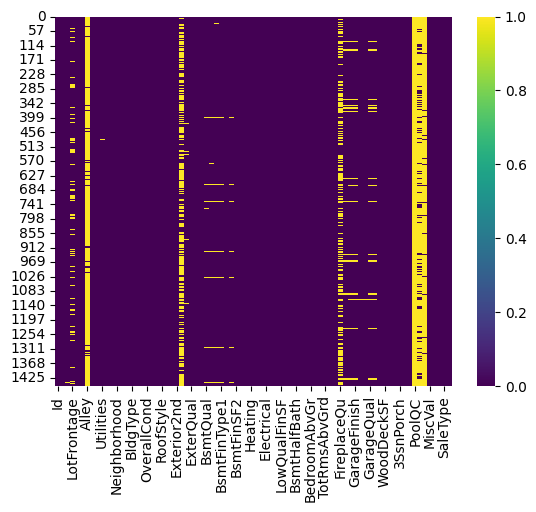

In [224]:
sns.heatmap(test_data.isnull(),cbar=True,cmap='viridis') 


In [225]:
null_counts = train_data.isnull().sum()


null_columns =null_counts[null_counts > 0]

null_info = pd.DataFrame({
    'Null Count': null_columns,
    'Data Type': train_data[null_columns.index].dtypes
})
null_info

,Null Count,Data Type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,872,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [226]:
null_counts_test = test_data.isnull().sum()


null_columns_test =null_counts_test[null_counts_test > 0]

null_info_test = pd.DataFrame({
    'Null Count Test': null_columns_test,
    'Data Type Test': test_data[null_columns_test.index].dtypes
})
null_info_test

,Null Count Test,Data Type Test
MSZoning,4,object
LotFrontage,227,float64
Alley,1352,object
Utilities,2,object
Exterior1st,1,object
Exterior2nd,1,object
MasVnrType,894,object
MasVnrArea,15,float64
BsmtQual,44,object
BsmtCond,45,object


In [227]:
meaning_Na_feats = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
#for feat that have many missing value with non meaning
def drop_colums(col_name):
    train_data.drop(col_name,axis=1,inplace=True)
    test_data.drop(col_name,axis=1,inplace=True)
    print(col_name," column dropped in both train and test data") 
    
#for cat feat and have meaning value
def convert_NaN_to_meaning_value(col_name,mean_value):
    train_data[col_name] = train_data[col_name].fillna(mean_value)
    test_data[col_name] = test_data[col_name].fillna(mean_value)

    # print(col_name," column converted")
    
# for cat feat and have no meaning value and for num feat
def convert_NaN_to_mode_or_mean(col_name):    
    if train_data[col_name].dtype == 'float64':
        mean = train_data[col_name].mean()
        train_data[col_name] = train_data[col_name].fillna(mean)
        test_data[col_name] = test_data[col_name].fillna(mean)

    else:
        mode = train_data[col_name].mode()[0]
        train_data[col_name] = train_data[col_name].fillna(mode)
        test_data[col_name] = test_data[col_name].fillna(mode)

for col in null_columns.index:
    # if null_columns[col] > 650 or col == 'Id' :
    # print(col)
    if col == 'MasVnrType' :
        drop_colums([col])
    elif col in meaning_Na_feats :
        convert_NaN_to_meaning_value(col, 'No_' + col)
    else:
        convert_NaN_to_mode_or_mean(col)
        
        
train_data_copy= test_data.copy()
drop_colums('Id')
        
        


['MasVnrType']  column dropped in both train and test data
Id  column dropped in both train and test data


In [228]:
null_counts_test = test_data.isnull().sum()


null_columns_test =null_counts_test[null_counts_test > 0]

null_info_test = pd.DataFrame({
    'Null Count Test': null_columns_test,
    'Data Type Test': test_data[null_columns_test.index].dtypes
})
for col in null_columns_test.index:
    convert_NaN_to_mode_or_mean(col) # to  convert  all  the  null  values  to  mode  or  mean  in  test  data



<Axes: >

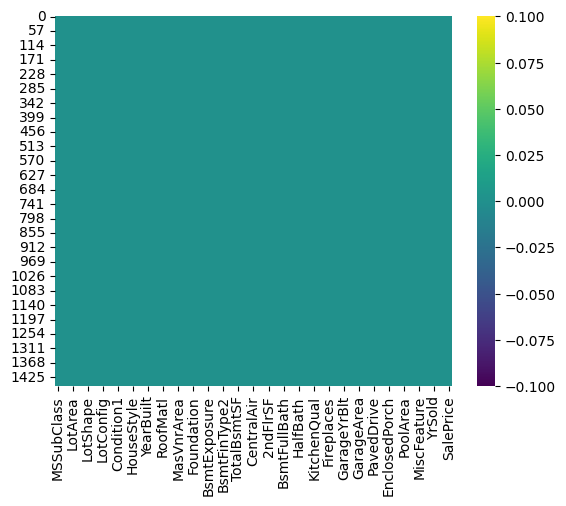

In [229]:
sns.heatmap(train_data.isnull(),cbar=True,cmap='viridis') 
#no more null vals for  the  train data 

<Axes: >

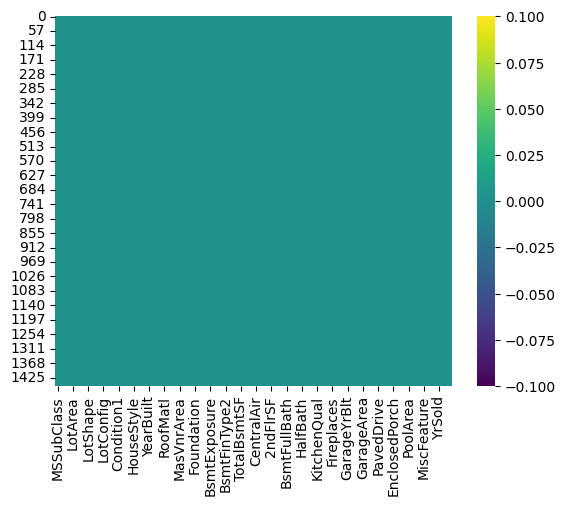

In [230]:
sns.heatmap(test_data.isnull(),cbar=True,cmap='viridis') 
#no more null vals for  the  test data

In [231]:
null_counts = train_data.isnull().sum()


null_columns =null_counts[null_counts > 0]

null_info = pd.DataFrame({
    'Null Count': null_columns,
    'Data Type': train_data[null_columns.index].dtypes
})
null_info

,Null Count,Data Type


In [232]:
train_data.shape

(1460, 79)

In [233]:
test_data.shape

(1459, 78)

In [234]:
final_data = pd.concat([train_data , test_data],axis=0) # bcs we have some types in some  categories tht are  not  in the  training data
final_data.shape

(2919, 79)

# Hundle categorical features

In [235]:
categorical_cols = final_data.select_dtypes(include=['object']).columns
len(categorical_cols)



42

In [236]:
def category_2_onehot_encoder(columns, final_data):
    df_tmp = final_data
    i = 0
    for col in columns:
        df1 = pd.get_dummies(final_data[col], drop_first=True).astype(int)
        final_data.drop([col], axis=1, inplace=True)
        if i == 0:
            df_tmp = df1.copy()
        else:
            df_tmp = pd.concat([df_tmp, df1], axis=1)
        i = 1
    
    final_data = pd.concat([final_data, df_tmp], axis=1)
    return final_data


In [237]:
final_data = category_2_onehot_encoder(categorical_cols , final_data)


In [238]:
final_data.shape

(2919, 256)

In [239]:
final_data = final_data.loc[:,~final_data.columns.duplicated()]
final_data.shape

(2919, 194)

In [240]:
final_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [241]:
train_data = final_data.iloc[:train_data.shape[0],:]
test_data = final_data.iloc[train_data.shape[0]:,:]


In [242]:
test_data.drop(['SalePrice'],axis=1,inplace=True)

# to use it  in other models
train_data.to_csv('cleaned_train_data.csv', index=False)
test_data.to_csv('cleaned_test_data.csv', index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5644\3663040130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['SalePrice'],axis=1,inplace=True)


In [243]:
X_train = train_data.drop(['SalePrice'],axis=1)
y_train = train_data['SalePrice']

# XGBOOST MODEL

In [244]:
from sklearn.metrics import mean_absolute_error  # type: ignore
classifier = xgb.XGBRegressor()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(test_data)
y_test = pd.read_csv('sample_submission.csv')['SalePrice']


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)     
          

Mean Absolute Error: 54796.42939603508


# Tune the  model

In [245]:
from sklearn.model_selection import RandomizedSearchCV  # type: ignore
params = {
    'eta': [0.18, 0.16, 0.14, 0.12, 0.1],  
    'n_estimators': [600, 650, 700, 750, 800],  
    'alpha': [50, 55, 60, 65, 70],        
    'subsample': [0.7, 0.8, 0.9],        
    'colsample_bytree': [0.7, 0.75, 0.8]   
}


In [246]:
random_search = RandomizedSearchCV(classifier, param_distributions=params,scoring='roc_auc', n_iter=5, cv=5,n_jobs=-1, verbose=3)

In [247]:
random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\DELL\Desktop\ML\House Price XGBoost\venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


{'subsample': 0.9,
 'n_estimators': 650,
 'eta': 0.12,
 'colsample_bytree': 0.75,
 'alpha': 50}

In [248]:
#tunnED model   
classifier = random_search.best_estimator_
classifier.fit(X_train, y_train)
y_pred = classifier.predict(test_data)
y_test = pd.read_csv('sample_submission.csv')['SalePrice']



In [249]:
X_train.shape

(1460, 193)

In [250]:
#for submitting
submission = pd.DataFrame({
        "Id": train_data_copy['Id'],
        "SalePrice": y_pred
    })
print( train_data_copy['Id'][0] , y_pred[0]  )
submission.to_csv('submission.csv', index=False)


1461 127080.01


In [251]:

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 54216.04091289952
